# FederatedPi
This is a project where we aim to apply a federated learning technique to a Multi-Layer Perceptron (MLP) model.

# Data Generation
    

In [104]:
#This file will generate data for training
#Temperature values range from 20C (death) to 43C (highest recorded fever) in humans, 36.5 to 37.5 being the o.k. range
#Resting heart rate values range in humans range from 60 (low for an old person) and 190 (high for a newborn)

    #newborn : 140 ± 50
    #1–2 ans : 110 ± 40
    #3–5 ans : 105 ± 35
    #6–12 ans : 95 ± 30
    #adolescent ou adulte : 70 ± 10
    #personne âgée : 65 ± 5

#We will generate values based on the age of subjects and a gaussian normal distribution
#from faker import Faker
#from faker.providers import BaseProvider
import random
import csv
import matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

def get_age():
    return  random.randrange(0, 100)

def get_Temp():
    mu= 37
    sigma= 0.5

    return round(random.gauss(mu,sigma), 1)

def get_HR(age):

    if age<1:
        mu= 140
        sigma= 50
    elif age<3:
        mu= 110
        sigma= 40
    elif age<5:
        mu= 105
        sigma= 35
    elif age<12:
        mu= 95
        sigma= 30
    elif age<65:
        mu= 70
        sigma= 10
    else:
        mu= 65
        sigma= 5

    return round(random.gauss(mu,sigma), 1)

def get_Label(age, temp, hr):
    label=0
    if ( 0<=age<1 and 90<=hr<=190 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 1<=age<3 and 70<=hr<=150 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 3<=age<6 and 70<=hr<=140 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 0<=age<12 and 65<=hr<=125 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( 12<=age<65 and 60<=hr<=90 and 36.5<temp<37.5 ):
        label=1
        return label

    if ( age>=65 and 60<=hr<=70 and 36.5<temp<37.5 ):
        label=1
        return label

    return label

def generate_DATA():
    a=get_age();
    b=get_Temp();
    c=get_HR(a);
    d=get_Label(a,b,c);
    return [a,b,c,d]
    #return [a,b,c,d]
    
def min_max_scaling(df):
    # copy the dataframe
    df_norm = df.copy()
    # apply min-max scaling
    for column in df_norm.columns:
        df_norm[column] = (df_norm[column] - df_norm[column].min()) / (df_norm[column].max() - df_norm[column].min())
        
    return df_norm

with open('Data_Train.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 1000):
        writer.writerow(generate_DATA())

with open('Data_Test.csv', 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Age', 'Temperature', 'HeartBPM', 'Label'])
    for n in range(1, 100):
        writer.writerow(generate_DATA())
        
#Data_Train = min_max_scaling(pd.read_csv('Data_Train.csv',dtype=np.float64))
#Data_Test = min_max_scaling(pd.read_csv('Data_Test.csv',dtype=np.float64))
Data_Train = pd.read_csv('Data_Train.csv')
Data_Test = pd.read_csv('Data_Test.csv')



##Data Visualisation

In [105]:
import seaborn as sns

<AxesSubplot:xlabel='Age', ylabel='Temperature'>

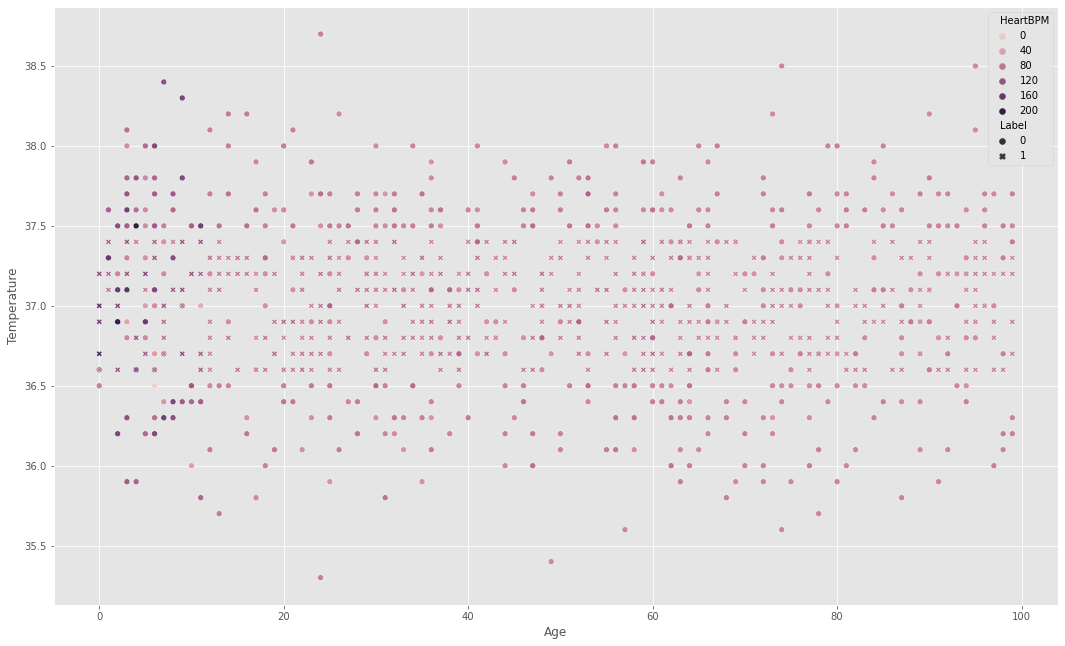

In [106]:
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = (18,11)
sns.scatterplot(y = Data_Train.Temperature, x=Data_Train.Age,
               hue = Data_Train.HeartBPM, style = Data_Train.Label)

In [102]:
sns.heatmap(y = Data_Train.Temperature, x=Data_Train.Age,
               hue = Data_Train.HeartBPM, style = Data_Train.Label)

TypeError: heatmap() missing 1 required positional argument: 'data'

<AxesSubplot:xlabel='Age', ylabel='HeartBPM'>

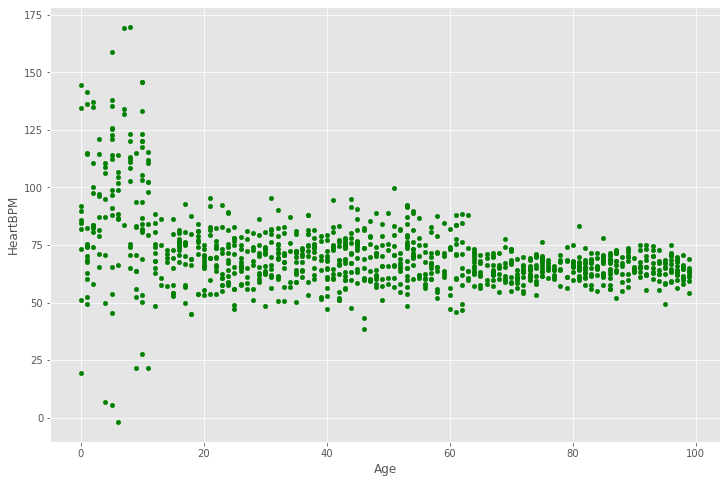

In [95]:
Data_Train.plot(kind='scatter',x='Age',y='HeartBPM', color ='green')


<AxesSubplot:xlabel='Temperature', ylabel='Age'>

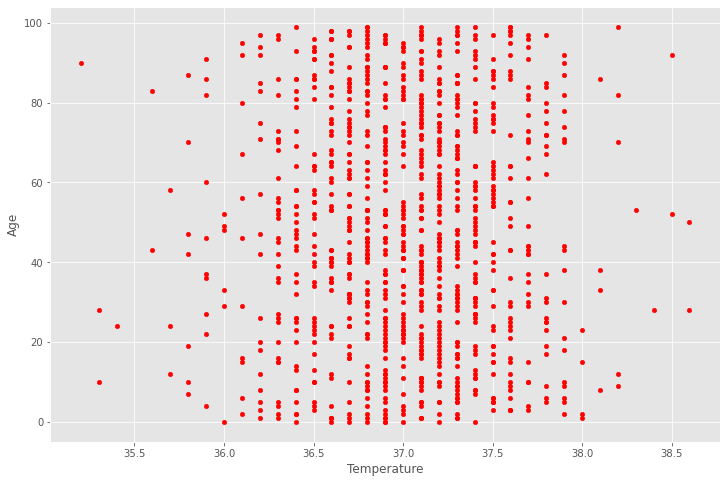

In [97]:
Data_Train.plot(kind='scatter',x='Temperature',y='Age', color ='red')

<AxesSubplot:xlabel='Label'>

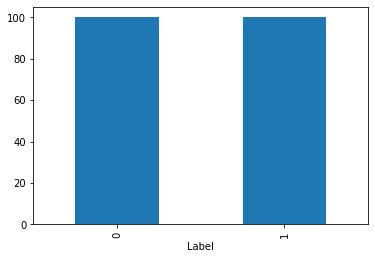

In [57]:
Data_Train.groupby('Label')['Age'].nunique().plot(kind='bar')


In [58]:
Data_Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          999 non-null    int64  
 1   Temperature  999 non-null    float64
 2   Heart rate   999 non-null    float64
 3   Label        999 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 31.3 KB


In [59]:
Data_Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          99 non-null     int64  
 1   Temperature  99 non-null     float64
 2   Heart rate   99 non-null     float64
 3   Label        99 non-null     int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [60]:
Data_Train.head(10)

,Age,Temperature,Heart rate,Label
0,8,36.7,136.0,0
1,12,37.2,60.3,1
2,57,37.1,60.1,1
3,40,37.4,70.3,1
4,73,36.7,61.2,1
5,45,36.8,60.2,1
6,43,36.9,70.4,1
7,36,36.9,70.2,1
8,0,37.2,119.8,1
9,80,37.0,53.6,0


In [61]:
Data_Test.head(10)

,Age,Temperature,Heart rate,Label
0,92,36.4,64.2,0
1,70,36.5,65.9,0
2,31,36.3,82.4,0
3,75,36.6,60.0,1
4,72,37.0,58.3,0
5,62,37.4,78.9,1
6,74,36.4,65.7,0
7,84,36.5,56.4,0
8,97,36.8,71.3,0
9,1,36.6,92.1,1


In [62]:
# train_dataset = np.loadtxt(open("Data.csv", "rb"), delimiter=",", skiprows=1)

In [63]:
Data_Train.describe()

,Age,Temperature,Heart rate,Label
count,999.000000,999.000000,999.000000,999.000000
mean,48.878879,36.992392,71.496597,0.460460
std,29.029222,0.496342,16.479786,0.498684
min,0.000000,35.400000,18.000000,0.000000
25%,24.000000,36.700000,62.800000,0.000000
50%,48.000000,37.000000,68.200000,0.000000
75%,74.000000,37.300000,75.000000,1.000000
max,99.000000,38.500000,214.900000,1.000000


In [64]:
Data_Test.describe()

,Age,Temperature,Heart rate,Label
count,99.000000,99.000000,99.000000,99.000000
mean,51.444444,36.960606,73.264646,0.454545
std,29.705776,0.521931,18.224324,0.500464
min,0.000000,35.600000,54.700000,0.000000
25%,29.500000,36.600000,61.650000,0.000000
50%,49.000000,37.000000,67.300000,0.000000
75%,75.500000,37.250000,75.400000,1.000000
max,98.000000,38.200000,150.100000,1.000000


In [65]:
sum(Data_Test.duplicated())
sum(Data_Train.duplicated())

0

## This dataset contains no : missing data, qualitative values, normalized values


# Data Pre-Processing

In [66]:
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from torch.utils.data.sampler import SubsetRandomSampler

# number of subprocesses to use for data loading
num_workers = 0

# percentage of training set to use as validation
valid_size = 0.2


In [67]:

# obtain training indices that will be used for validation
num_train = len(Data_Train)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(np.floor(valid_size * num_train))
train_idx, valid_idx = indices[split:], indices[:split]


In [68]:

# define samplers for obtaining training and validation batches
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)

targets_df = pd.DataFrame(data=Data_Train['Label'])
targets_df.columns = ['Label']


del Data_Train['Label']

train = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Train)), torch.tensor(targets_df['Label'].values))

train_loader = torch.utils.data.DataLoader(train,sampler=train_sampler, num_workers=num_workers)

valid_loader = torch.utils.data.DataLoader(train,sampler=valid_sampler, num_workers=num_workers)

test_targets_df = pd.DataFrame(data=Data_Test['Label'])
test_targets_df.columns = ['Label']

del Data_Test['Label']

test = torch.utils.data.TensorDataset(torch.Tensor(np.array(Data_Test)), torch.tensor(test_targets_df['Label'].values))

test_loader = torch.utils.data.DataLoader(test,num_workers=num_workers)

In [69]:
train_loader

In [70]:
test_loader

# Building Model

In [71]:
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch import nn
class Network(nn.Module):

    def __init__(self):
        super().__init__()

        # Inputs to hidden layer linear transformation
        #self.drop1 = nn.Dropout(p=0.8)
        self.input = nn.Linear(3, 5)
        #self.drop2 = nn.Dropout(p=0.5)
        self.hidden1 = nn.Linear(5, 5)
        self.hidden2 = nn.Linear(5, 4)
#         self.hidden3 = nn.Linear(5, 5)
#         self.hidden4 = nn.Linear(5, 5)
        self.hidden5 = nn.Linear(4, 2)
        
        self.output = nn.Linear(2, 2)
        # Define sigmoid activation and softmax output
        self.ReLU = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        # Pass the input tensor through each of our operations
        #x = self.drop1(x)
        x = self.input(x)
        #x = self.drop2(x)
        x = self.hidden1(x)
        x = self.hidden2(x)
#         x = self.hidden3(x)
#         x = self.hidden4(x)
        x = self.hidden5(x)

        x = self.ReLU(x)
        x = self.output(x)
        
        x = self.softmax(x)

        return x

model = Network()


In [72]:
model

Network(
  (input): Linear(in_features=3, out_features=5, bias=True)
  (hidden1): Linear(in_features=5, out_features=5, bias=True)
  (hidden2): Linear(in_features=5, out_features=4, bias=True)
  (hidden5): Linear(in_features=4, out_features=2, bias=True)
  (output): Linear(in_features=2, out_features=2, bias=True)
  (ReLU): ReLU()
  (softmax): Softmax(dim=1)
)

# Training Model

In [73]:
# specify loss function (categorical cross-entropy)
criterion = nn.CrossEntropyLoss()

# specify optimizer (stochastic gradient descent)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
# optimizer = torch.optim.NAdam(model.parameters(), lr=0.2, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, momentum_decay=0.004)
optimizer = torch.optim.Adam(model.parameters(), lr=0.03, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)

In [74]:
import matplotlib.pyplot as plt

val_losses = []
train_losses = []

## https://www.kaggle.com/shubhendumishra/titanic-mlp-model-using-pytorch#Data-Exploration

In [75]:
# number of epochs to train the model
n_epochs = 100

# initialize tracker for minimum validation loss
valid_loss_min = np.Inf # set initial "min" to infinity

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0
    
    ###################
    # train the model #
    ###################
    model.train() # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #train_losses.append(loss.item())
    train_losses.append(train_loss/len(train_loader.sampler))
        
    ######################    
    # validate the model #
    ######################
    model.eval() # prep model for evaluation
    for data, target in valid_loader:
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data[:,0:3])
        # calculate the loss
        loss = criterion(output, target)
        # update running validation loss 
        valid_loss += loss.item()*data.size(0)
    #############
    #Tensorboard#
    #############
        #val_losses.append(loss.item())
    val_losses.append(valid_loss/len(valid_loader.sampler))
        
    # print training/validation statistics 
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch+1, 
        train_loss,
        valid_loss
        ))

    # save model if validation loss has decreased
    if valid_loss <= valid_loss_min:
        print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
        valid_loss_min,
        valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss

Epoch: 1 	Training Loss: 0.695981 	Validation Loss: 0.688582
Validation loss decreased (inf --> 0.688582).  Saving model ...
Epoch: 2 	Training Loss: 0.695622 	Validation Loss: 0.689004
Epoch: 3 	Training Loss: 0.696436 	Validation Loss: 0.691690
Epoch: 4 	Training Loss: 0.693146 	Validation Loss: 0.713518
Epoch: 5 	Training Loss: 0.694356 	Validation Loss: 0.688850
Epoch: 6 	Training Loss: 0.694000 	Validation Loss: 0.689487
Epoch: 7 	Training Loss: 0.692800 	Validation Loss: 0.689777
Epoch: 8 	Training Loss: 0.695342 	Validation Loss: 0.691372
Epoch: 9 	Training Loss: 0.694760 	Validation Loss: 0.688640
Epoch: 10 	Training Loss: 0.696142 	Validation Loss: 0.688848
Epoch: 11 	Training Loss: 0.694323 	Validation Loss: 0.689824
Epoch: 12 	Training Loss: 0.695330 	Validation Loss: 0.689851
Epoch: 13 	Training Loss: 0.693191 	Validation Loss: 0.689791
Epoch: 14 	Training Loss: 0.694346 	Validation Loss: 0.688973
Epoch: 15 	Training Loss: 0.695046 	Validation Loss: 0.689417
Epoch: 16 	Trai

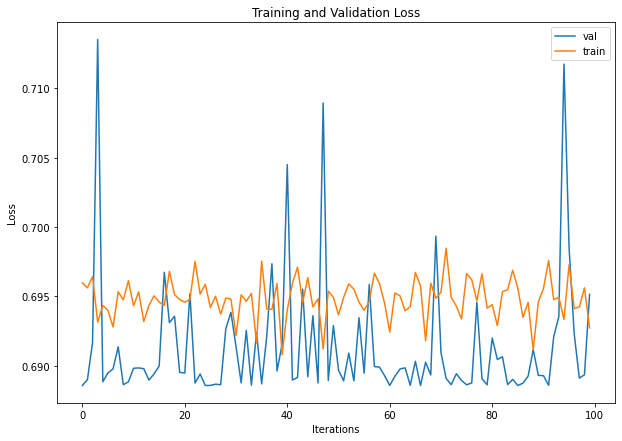

In [76]:
plt.figure(figsize=(10,7))
plt.title("Training and Validation Loss")
plt.plot(val_losses,label="val")
plt.plot(train_losses,label="train")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [77]:
model.load_state_dict(torch.load('model.pt'))

<All keys matched successfully>

In [78]:
Data_Test.head()

,Age,Temperature,Heart rate
0,92,36.4,64.2
1,70,36.5,65.9
2,31,36.3,82.4
3,75,36.6,60.0
4,72,37.0,58.3


In [79]:
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for evaluation
results=[]
for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data[:,:3])
    print(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss 
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    results.append([int(data[:,0].item()), pred.item()])
    # compare predictions to true label
    correct = pred.eq(target.view_as(pred))
  
    # calculate test accuracy for each object class
    #break
    #print('Output %s Target %s Predicted %s Correct %s' % (output,target.item(),pred.item(),correct.item()))
    for i in range(len(target)):
        label = target.data
        class_correct[label] += correct.item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.sampler)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

tensor([[92.0000, 36.4000, 64.2000]])
tensor([[70.0000, 36.5000, 65.9000]])
tensor([[31.0000, 36.3000, 82.4000]])
tensor([[75.0000, 36.6000, 60.0000]])
tensor([[72.0000, 37.0000, 58.3000]])
tensor([[62.0000, 37.4000, 78.9000]])
tensor([[74.0000, 36.4000, 65.7000]])
tensor([[84.0000, 36.5000, 56.4000]])
tensor([[97.0000, 36.8000, 71.3000]])
tensor([[ 1.0000, 36.6000, 92.1000]])
tensor([[34.0000, 37.3000, 72.3000]])
tensor([[67.0000, 37.6000, 61.0000]])
tensor([[64.0000, 38.2000, 77.5000]])
tensor([[22.0000, 37.2000, 67.5000]])
tensor([[42.0000, 37.2000, 77.1000]])
tensor([[  1.0000,  36.6000, 104.8000]])
tensor([[94.0000, 37.3000, 63.6000]])
tensor([[39.0000, 36.3000, 65.9000]])
tensor([[59.0000, 38.2000, 70.5000]])
tensor([[43.0000, 36.9000, 86.1000]])
tensor([[79.0000, 37.4000, 59.5000]])
tensor([[42.0000, 37.2000, 70.5000]])
tensor([[94.0000, 37.1000, 64.5000]])
tensor([[70.0000, 37.0000, 72.9000]])
tensor([[76.0000, 37.1000, 59.5000]])
tensor([[43.0000, 36.7000, 66.5000]])
tensor([[